final estimate 5.085048790445474


c:\users\sanik\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


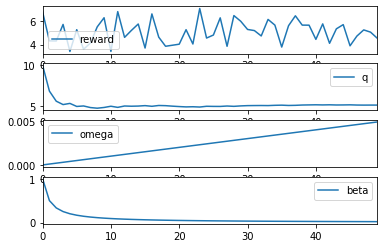

In [3]:
from collections import defaultdict
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


alpha = 0.0001
q = 10
omega = 0

stats = defaultdict(list)

for step in range(50):
    stats['q'].append(q)
    stats['omega'].append(omega)

    omega = omega + alpha * (1 - omega)
    beta = alpha / omega
    stats['beta'].append(beta)

    reward = np.random.normal(loc=5, scale=1)
    stats['reward'].append(reward)

    q += beta * (reward - q)

result = pd.DataFrame().from_dict(stats)

f, a = plt.subplots(nrows=4)

result.plot(y='reward', ax=a[0])
result.plot(y='q', ax=a[1])
result.plot(y='omega', ax=a[2])
result.plot(y='beta', ax=a[3])

print('final estimate {}'.format(stats['q'][-1]))

f.show()

In [11]:
import numpy as np
import statsmodels.api as sm

np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 250)
model = sm.tsa.ARMA(y, (2, 2)).fit(trend='nc', disp=0)
model.params

array([ 0.79044193, -0.23140635,  0.70072907,  0.40608024])

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1399.327
Method:                       css-mle   S.D. of innovations              0.980
Date:                Sun, 06 Oct 2019   AIC                           2804.654
Time:                        18:55:14   BIC                           2819.377
Sample:                             0   HQIC                          2810.249
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0847      0.265      0.319      0.750      -0.435       0.605
ar.L1.y        0.8841      0.015     59.985      0.000       0.855       0.913
                                    Roots           

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

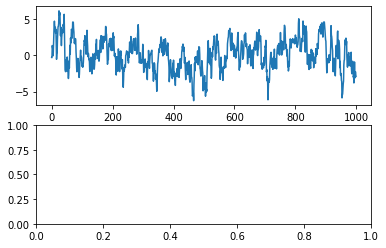

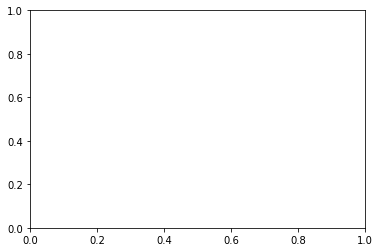

In [20]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)


from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data_1, order=(1,0))
result = mod.fit()
print(result.summary())
print(result.params)

from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start='2016-07-01', end='2017-06-01')
plt.show()